In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/credit-profile-two-wheeler-loan-dataset/credit_data.csv')
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [3]:
df.nunique()

Age                            53
Gender                          3
Income                        201
Credit Score                  551
Credit History Length         606
Number of Existing Loans       11
Loan Amount                 55681
Loan Tenure                   348
Existing Customer               2
State                          10
City                           23
LTV Ratio                   80874
Employment Profile              5
Profile Score                 101
Occupation                     14
dtype: int64

<Axes: ylabel='Frequency'>

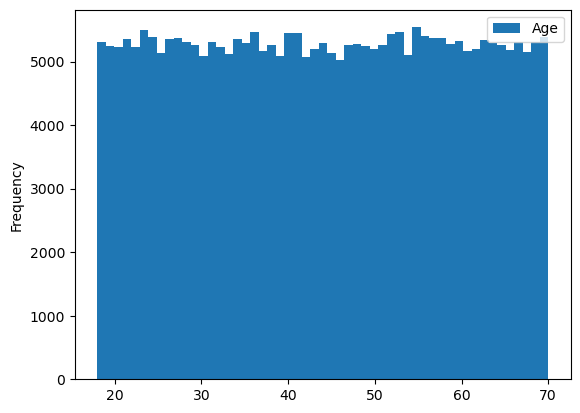

In [4]:
df['Age'].plot.hist(bins=1 + df['Age'].max() - df['Age'].min(), legend=True)

It's interesting that the borrowers have ages that are essentially uniformly distributed.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

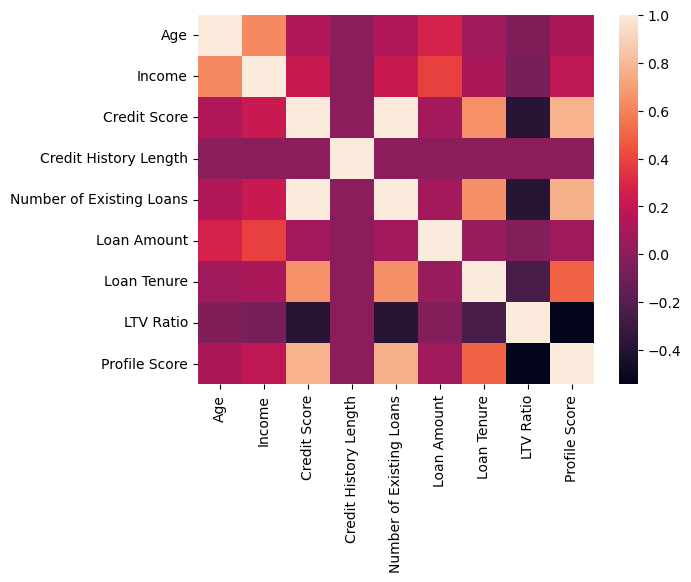

In [5]:
from seaborn import heatmap
heatmap(data=df.corr(numeric_only=True))

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


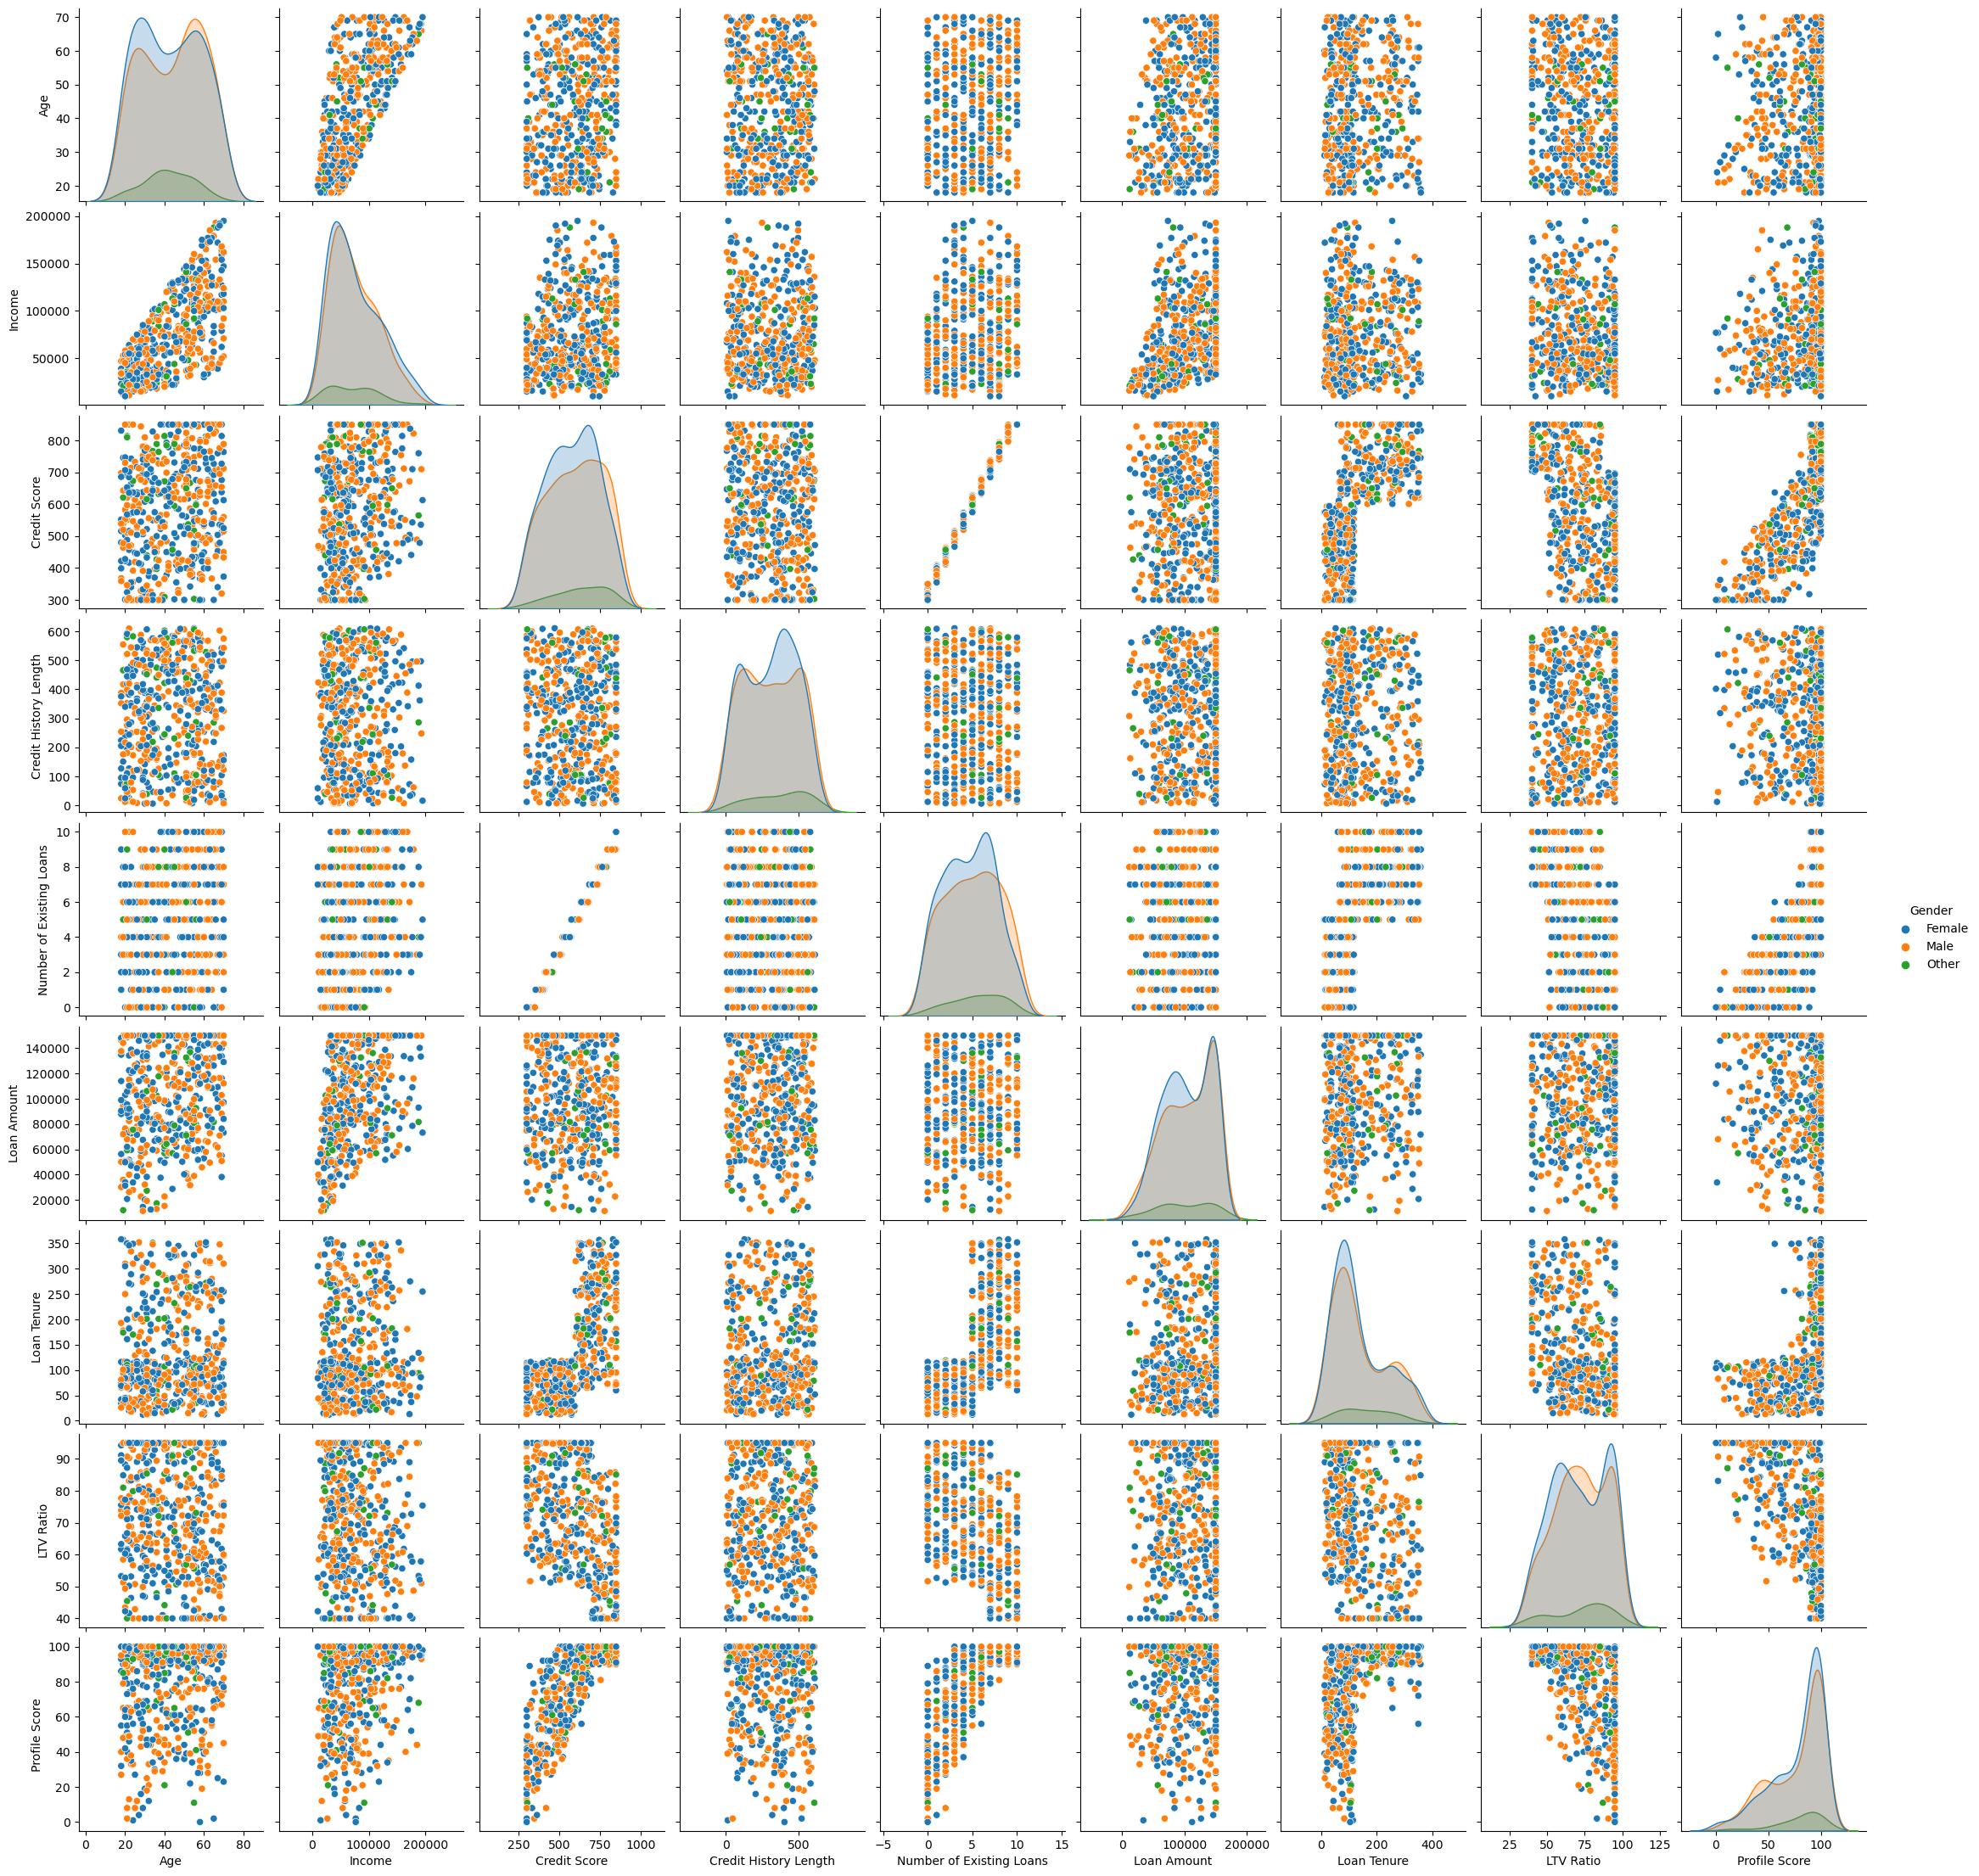

In [6]:
from seaborn import pairplot
sample_size = 500
pairplot(data=df.sample(sample_size), hue='Gender')

There's so much to look into here; we've taken a small sample for performance reasons, and it's possible the small sample size is causing some artifacts.

<Axes: xlabel='LTV Ratio', ylabel='Count'>

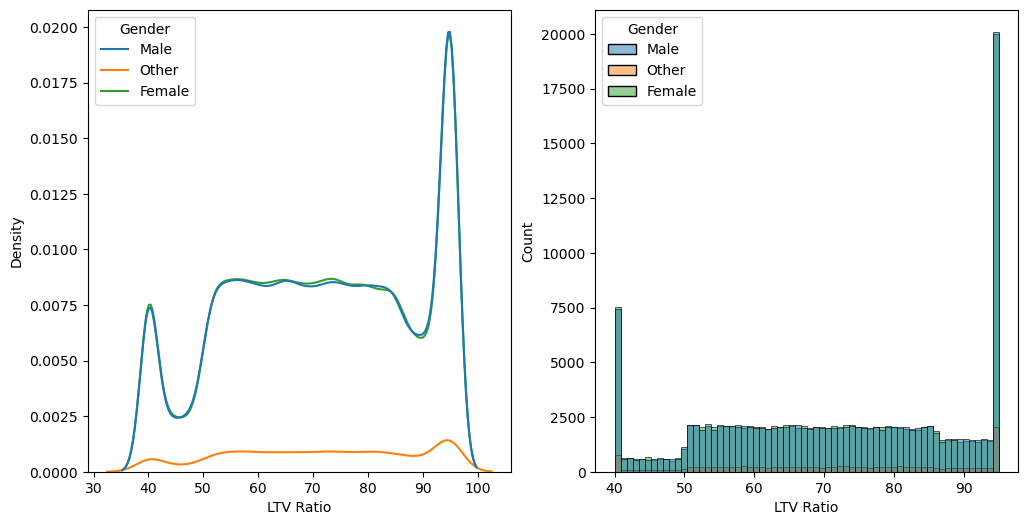

In [7]:
from matplotlib.pyplot import subplots
from seaborn import histplot
from seaborn import kdeplot
_, ax = subplots(figsize=(12, 6), ncols=2)
kdeplot(ax=ax[0], data=df, x='LTV Ratio', hue='Gender')
histplot(ax=ax[1], data=df, x='LTV Ratio', hue='Gender')

The gender slices are very close; that LTV curve just looks weird.

<Axes: xlabel='Credit Score', ylabel='Count'>

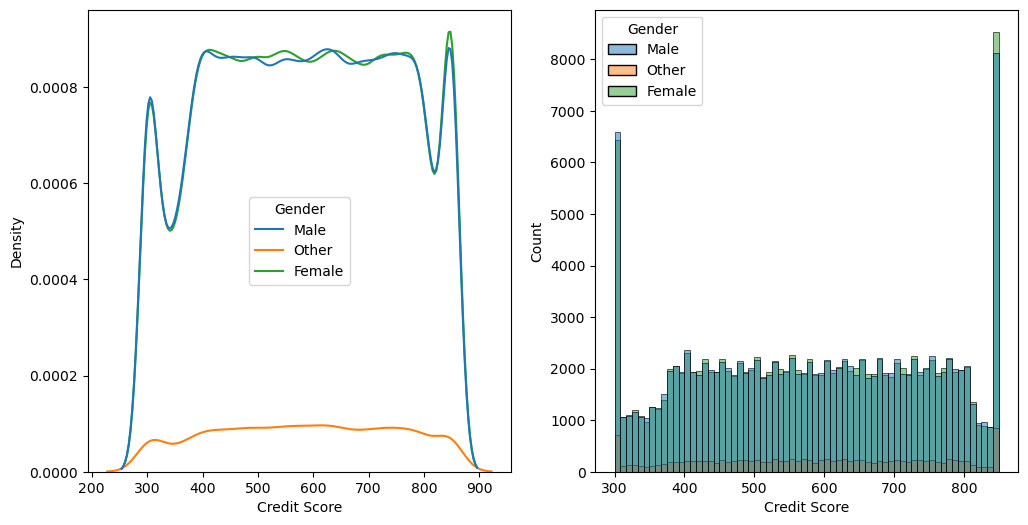

In [8]:
_, ax = subplots(figsize=(12, 6), ncols=2)
kdeplot(ax=ax[0], data=df, x='Credit Score', hue='Gender')
histplot(ax=ax[1], data=df, x='Credit Score', hue='Gender')

<Axes: xlabel='Age', ylabel='Count'>

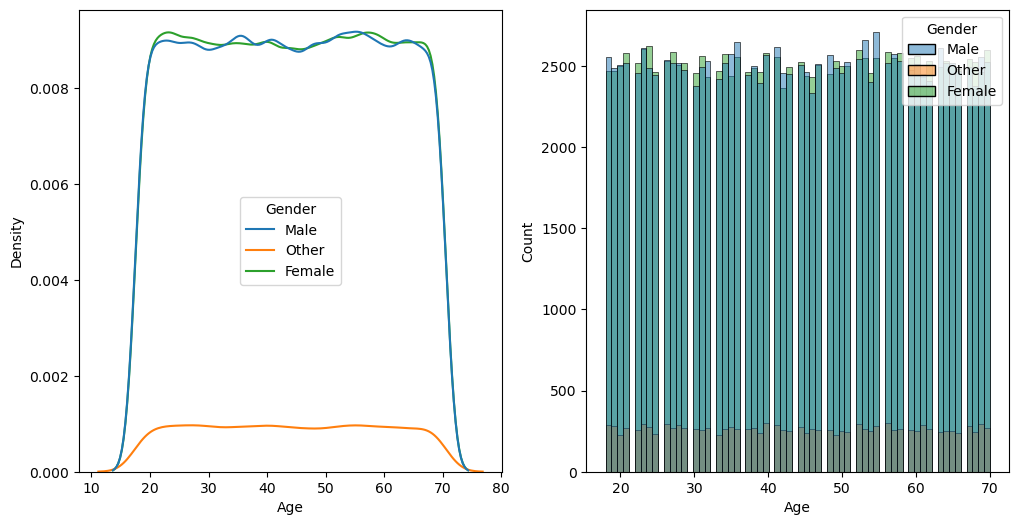

In [9]:
_, ax = subplots(figsize=(12, 6), ncols=2)
kdeplot(ax=ax[0], data=df, x='Age', hue='Gender')
histplot(ax=ax[1], data=df, x='Age', hue='Gender')